# Imports

In [1]:
import sys
import copy
import numpy as np
from model.base import CovidModel, SimulationParameters, set_parameters, normal_ci
from utils import BasicStatistics, RemovePolicy, Propaganda, setup_city_layout,confidence_interval,multiple_runs
from model.utils import SocialPolicy

# Parameters settings

Default parameters. Unless explicitly overriden, these values are used in all scenarios

In [2]:
common_parameters = SimulationParameters(
    mask_user_rate = 0.0,
    mask_efficacy = 0.0,
    imune_rate = 0.01,
    initial_infection_rate = 0.01,
    hospitalization_capacity = 0.05,
    latency_period_shape = 3,
    latency_period_scale = 1, 
    incubation_period_shape = 6,
    incubation_period_scale = 1, 
    mild_period_duration_shape = 14,
    mild_period_duration_scale = 1,
    hospitalization_period_duration_shape = 12,
    hospitalization_period_duration_scale = 1,
    symptomatic_isolation_rate = 0.0,
    asymptomatic_contagion_probability =    0.1,
    risk_tolerance_mean = 0.7,
    risk_tolerance_stdev = 0.2,
    herding_behavior_mean = 0.1,
    herding_behavior_stdev = 0.0,
    allowed_restaurant_capacity = 1.0, # valid values: {1.0, 0.50, 0.25}
    spreading_rate = normal_ci(2.41, 3.90, 20),
    extroversion_mean = 0.5,
    extroversion_stdev = 0.2,
    min_behaviors_to_copy = 1 
)


# Simulation setup

In [3]:
population_size = 1000
simulation_cycles = 90 # days

In [4]:
seed = 313

In [5]:
np.random.seed(seed)
scenario = {}

In [6]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)


# Scenarios

## Scenario 1

Do nothing.  In order to print out where every agent is for every step of the day, every 20 days, set debug to True when you make the CovidModel.  You can also set debug to True on multiple runs to print stats out there as well.

In [7]:
from model.base import logger
import logging 
setLevel(logging.DEBUG)

sc = 1
params = copy.deepcopy(common_parameters)
set_parameters(params)
model = CovidModel()
logger().model = model
seed = 4
np.random.seed(seed)
setup_city_layout(model, population_size)

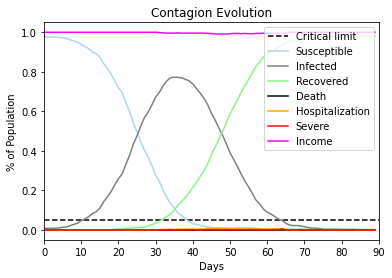

In [8]:
model.reset_randomizer(seed)
statistics = BasicStatistics(model)
model.add_listener(statistics)
for i in range(simulation_cycles):
    model.step()
statistics.export_chart("scenario" + str(sc) + ".png")
statistics.export_csv("scenario" + str(sc) + ".csv")

To save time these samples were run with 3 runs, but significant results often require 30 runs, so these numbers should be changed during debugging.

In [9]:
import logging
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs=30,do_print = True)

Save these seeds if you want to rerun a scenario
[630, 7340, 4372, 2434, 1022, 465, 5075, 4079, 3202, 2253, 5746, 1411, 2736, 6849, 4737, 8377, 6773, 856, 9153, 2585, 1765, 9454, 922, 9744, 5259, 8307, 9993, 7648, 4551, 769]
run with seed 630:
run with seed 7340:
run with seed 4372:
run with seed 2434:
run with seed 1022:
run with seed 465:
run with seed 5075:
run with seed 4079:
run with seed 3202:
run with seed 2253:
run with seed 5746:
run with seed 1411:
run with seed 2736:
run with seed 6849:
run with seed 4737:
run with seed 8377:
run with seed 6773:
run with seed 856:
run with seed 9153:
run with seed 2585:
run with seed 1765:
run with seed 9454:
run with seed 922:
run with seed 9744:
run with seed 5259:
run with seed 8307:
run with seed 9993:
run with seed 7648:
run with seed 4551:
run with seed 769:
using average of time series:
stats on susceptible:
data: [0.39724444444444446, 0.2126222222222223, 0.23149999999999993, 0.24979464979464974, 0.24631111111111118, 0.497058497058497

(<function dict.items>, <function dict.items>, <function dict.items>)

## Scenario 2

Complete lockdown

In [10]:
from model.base import logger
import logging 
setLevel(logging.DEBUG)

sc = 2
params = copy.deepcopy(common_parameters)
params.params['social_policies'] = [
    SocialPolicy.LOCKDOWN_OFFICE,
    SocialPolicy.LOCKDOWN_FACTORY,
    SocialPolicy.LOCKDOWN_RETAIL,
    SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL,
    SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL,
    SocialPolicy.LOCKDOWN_HIGH_SCHOOL,
    SocialPolicy.SOCIAL_DISTANCING
]
set_parameters(params)
model = CovidModel()
logger().model = model
np.random.seed(seed)
setup_city_layout(model, population_size)

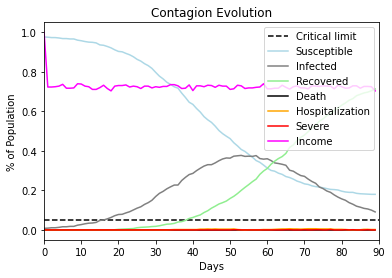

In [11]:
model.reset_randomizer(seed)
statistics = BasicStatistics(model)
model.add_listener(statistics)
for i in range(simulation_cycles):
    model.step()
statistics.export_chart("scenario" + str(sc) + ".png")
statistics.export_csv("scenario" + str(sc) + ".csv")

In [12]:
import logging
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs=30,do_print = True)

Save these seeds if you want to rerun a scenario
[6149, 2515, 2877, 7621, 6255, 1225, 4982, 4957, 9376, 2367, 8942, 5823, 6145, 9814, 21, 565, 331, 1290, 7813, 5040, 9620, 8305, 4494, 5037, 2121, 6201, 7022, 3551, 7111, 2735]
run with seed 6149:
run with seed 2515:
run with seed 2877:
run with seed 7621:
run with seed 6255:
run with seed 1225:
run with seed 4982:
run with seed 4957:
run with seed 9376:
run with seed 2367:
run with seed 8942:
run with seed 5823:
run with seed 6145:
run with seed 9814:
run with seed 21:
run with seed 565:
run with seed 331:
run with seed 1290:
run with seed 7813:
run with seed 5040:
run with seed 9620:
run with seed 8305:
run with seed 4494:
run with seed 5037:
run with seed 2121:
run with seed 6201:
run with seed 7022:
run with seed 3551:
run with seed 7111:
run with seed 2735:
using average of time series:
stats on susceptible:
data: [0.782988888888889, 0.7410546139359698, 0.5836052836052835, 0.45725555555555564, 0.7645666666666667, 0.965, 0.5300444444

(<function dict.items>, <function dict.items>, <function dict.items>)

## Scenario 3

Start with complete lockdown then gradually unlock schools on simulation day 30, 60 and 90


In [14]:
from model.base import logger
import logging 
setLevel(logging.DEBUG)

sc = 3
params = copy.deepcopy(common_parameters)
params.params['social_policies'] = [
    SocialPolicy.LOCKDOWN_OFFICE,
    SocialPolicy.LOCKDOWN_FACTORY,
    SocialPolicy.LOCKDOWN_RETAIL,
    SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL,
    SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL,
    SocialPolicy.LOCKDOWN_HIGH_SCHOOL,
    SocialPolicy.SOCIAL_DISTANCING
]

set_parameters(params)
model = CovidModel()
logger().model = model
np.random.seed(seed)
setup_city_layout(model, population_size)
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL, 30))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 60))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_HIGH_SCHOOL, 90))

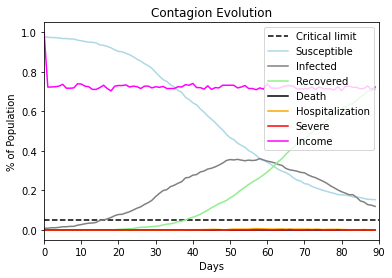

In [15]:
model.reset_randomizer(seed)
statistics = BasicStatistics(model)
model.add_listener(statistics)
for i in range(simulation_cycles):
    model.step()
statistics.export_chart("scenario" + str(sc) + ".png")
statistics.export_csv("scenario" + str(sc) + ".csv")

In [16]:
import logging
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs=30,do_print = True)

Save these seeds if you want to rerun a scenario
[5659, 9433, 9979, 1365, 1423, 7724, 7984, 1022, 1646, 3015, 447, 8311, 6452, 2670, 8170, 1328, 6712, 1953, 3216, 3900, 8948, 8261, 6983, 6355, 9982, 6914, 309, 6767, 2336, 6105]
run with seed 5659:
run with seed 9433:
run with seed 9979:
run with seed 1365:
run with seed 1423:
run with seed 7724:
run with seed 7984:
run with seed 1022:
run with seed 1646:
run with seed 3015:
run with seed 447:
run with seed 8311:
run with seed 6452:
run with seed 2670:
run with seed 8170:
run with seed 1328:
run with seed 6712:
run with seed 1953:
run with seed 3216:
run with seed 3900:
run with seed 8948:
run with seed 8261:
run with seed 6983:
run with seed 6355:
run with seed 9982:
run with seed 6914:
run with seed 309:
run with seed 6767:
run with seed 2336:
run with seed 6105:
using average of time series:
stats on susceptible:
data: [0.4128888888888889, 0.49956666666666666, 0.3557442557442558, 0.6473777777777777, 0.4360666666666666, 0.425955555555

(<function dict.items>, <function dict.items>, <function dict.items>)

## Scenario 4

Like scenario 3 but simulate the start of a public campaing in day 30 to reinforce the importance of social distancing and consequently reduce the overall risk tolerance of the population

In [7]:
from model.base import logger
import logging 
setLevel(logging.DEBUG)

sc = 4
params = copy.deepcopy(common_parameters)
params.params['social_policies'] = [
    SocialPolicy.LOCKDOWN_OFFICE,
    SocialPolicy.LOCKDOWN_FACTORY,
    SocialPolicy.LOCKDOWN_RETAIL,
    SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL,
    SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL,
    SocialPolicy.LOCKDOWN_HIGH_SCHOOL,
    SocialPolicy.SOCIAL_DISTANCING
]

set_parameters(params)
model = CovidModel()
logger().model = model
np.random.seed(seed)
setup_city_layout(model, population_size)
model.add_listener(Propaganda(model, 30))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL, 30))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 60))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_HIGH_SCHOOL, 90))

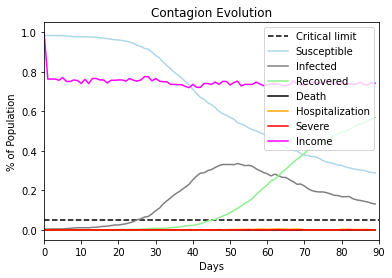

In [8]:
model.reset_randomizer(seed)
statistics = BasicStatistics(model)
model.add_listener(statistics)
for i in range(simulation_cycles):
    model.step()
statistics.export_chart("scenario" + str(sc) + ".png")
statistics.export_csv("scenario" + str(sc) + ".csv")

In [9]:
import logging
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs=30,do_print = True)

Save these seeds if you want to rerun a scenario
[572, 8987, 6898, 3314, 9950, 706, 2622, 2699, 8683, 1665, 9997, 2989, 1319, 1981, 5277, 3062, 2345, 2691, 7340, 7532, 3401, 3846, 4924, 1902, 2900, 5019, 902, 3127, 2839, 9307]
run with seed 572:
run with seed 8987:
run with seed 6898:
run with seed 3314:
run with seed 9950:
run with seed 706:
run with seed 2622:
run with seed 2699:
run with seed 8683:
run with seed 1665:
run with seed 9997:
run with seed 2989:
run with seed 1319:
run with seed 1981:
run with seed 5277:
run with seed 3062:
run with seed 2345:
run with seed 2691:
run with seed 7340:
run with seed 7532:
run with seed 3401:
run with seed 3846:
run with seed 4924:
run with seed 1902:
run with seed 2900:
run with seed 5019:
run with seed 902:
run with seed 3127:
run with seed 2839:
run with seed 9307:
using average of time series:
stats on susceptible:
data: [0.4226777777777778, 0.5492666666666667, 0.871588888888889, 0.33163242765628453, 0.540848040848041, 0.6188555555555556

(<function dict.items>, <function dict.items>, <function dict.items>)

## Scenario 5

Like scenario 4 but start the campaing in day 1

In [10]:
from model.base import logger
import logging 
setLevel(logging.DEBUG)

sc = 5
params = copy.deepcopy(common_parameters)
params.params['social_policies'] = [
    SocialPolicy.LOCKDOWN_OFFICE,
    SocialPolicy.LOCKDOWN_FACTORY,
    SocialPolicy.LOCKDOWN_RETAIL,
    SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL,
    SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL,
    SocialPolicy.LOCKDOWN_HIGH_SCHOOL,
    SocialPolicy.SOCIAL_DISTANCING
]

set_parameters(params)
model = CovidModel()
logger().model = model
np.random.seed(seed)
setup_city_layout(model, population_size)
model.add_listener(Propaganda(model, 1))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL, 30))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 60))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_HIGH_SCHOOL, 90))

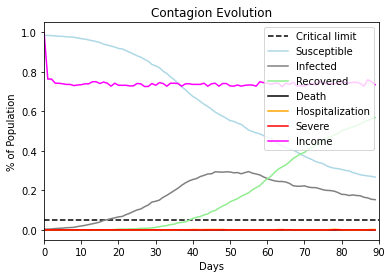

In [11]:
model.reset_randomizer(seed)
statistics = BasicStatistics(model)
model.add_listener(statistics)
for i in range(simulation_cycles):
    model.step()
statistics.export_chart("scenario" + str(sc) + ".png")
statistics.export_csv("scenario" + str(sc) + ".csv")

In [12]:
import logging
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs=30,do_print = True)

Save these seeds if you want to rerun a scenario
[4519, 7378, 1425, 3491, 3657, 4146, 7913, 9043, 3067, 337, 6941, 5581, 7536, 7585, 7960, 5371, 811, 3857, 4509, 8401, 3965, 5100, 8391, 7946, 9558, 5888, 3785, 7982, 5726, 5749]
run with seed 4519:
run with seed 7378:
run with seed 1425:
run with seed 3491:
run with seed 3657:
run with seed 4146:
run with seed 7913:
run with seed 9043:
run with seed 3067:
run with seed 337:
run with seed 6941:
run with seed 5581:
run with seed 7536:
run with seed 7585:
run with seed 7960:
run with seed 5371:
run with seed 811:
run with seed 3857:
run with seed 4509:
run with seed 8401:
run with seed 3965:
run with seed 5100:
run with seed 8391:
run with seed 7946:
run with seed 9558:
run with seed 5888:
run with seed 3785:
run with seed 7982:
run with seed 5726:
run with seed 5749:
using average of time series:
stats on susceptible:
data: [0.329208250166334, 0.5420555555555556, 0.5193444444444444, 0.44466622310933696, 0.7684333333333332, 0.5457666666666

(<function dict.items>, <function dict.items>, <function dict.items>)

## Scenario 6

Begins with complete lockdown for 30 days, then all sectors are being gradually "unlocked"

In [13]:
from model.base import logger
import logging 
setLevel(logging.DEBUG)

sc = 6
params = copy.deepcopy(common_parameters)
params.params['social_policies'] = [
    SocialPolicy.LOCKDOWN_OFFICE,
    SocialPolicy.LOCKDOWN_FACTORY,
    SocialPolicy.LOCKDOWN_RETAIL,
    SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL,
    SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL,
    SocialPolicy.LOCKDOWN_HIGH_SCHOOL,
    SocialPolicy.SOCIAL_DISTANCING
]

set_parameters(params)
model = CovidModel()
logger().model = model
np.random.seed(seed)
setup_city_layout(model, population_size)
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_RETAIL, 30))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_FACTORY, 60))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_OFFICE, 90))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL, 90))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 90))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_HIGH_SCHOOL, 120))

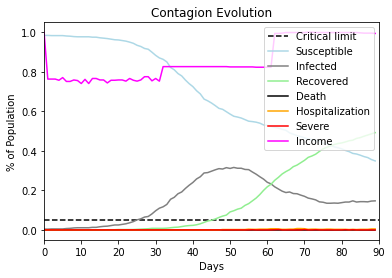

In [14]:
model.reset_randomizer(seed)
statistics = BasicStatistics(model)
model.add_listener(statistics)
for i in range(simulation_cycles):
    model.step()
statistics.export_chart("scenario" + str(sc) + ".png")
statistics.export_csv("scenario" + str(sc) + ".csv")

In [15]:
import logging
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs=30,do_print = True)

Save these seeds if you want to rerun a scenario
[6739, 6374, 387, 4027, 8952, 9015, 8649, 978, 225, 5966, 1392, 7132, 7501, 7525, 3489, 6917, 1182, 2574, 4962, 1163, 5819, 262, 739, 2452, 2779, 2893, 4999, 468, 3187, 2154]
run with seed 6739:
run with seed 6374:
run with seed 387:
run with seed 4027:
run with seed 8952:
run with seed 9015:
run with seed 8649:
run with seed 978:
run with seed 225:
run with seed 5966:
run with seed 1392:
run with seed 7132:
run with seed 7501:
run with seed 7525:
run with seed 3489:
run with seed 6917:
run with seed 1182:
run with seed 2574:
run with seed 4962:
run with seed 1163:
run with seed 5819:
run with seed 262:
run with seed 739:
run with seed 2452:
run with seed 2779:
run with seed 2893:
run with seed 4999:
run with seed 468:
run with seed 3187:
run with seed 2154:
using average of time series:
stats on susceptible:
data: [0.5411333333333334, 0.8097569097569097, 0.628729526339088, 0.6505222222222222, 0.5559999999999999, 0.6357555555555554, 0.29

(<function dict.items>, <function dict.items>, <function dict.items>)

## Scenario 7

Like scenario 6 but in day 1 a campaign to encourage social distancing is started and the overall risk tolerance of people starts decreasing gradually.

In [16]:
from model.base import logger
import logging 
setLevel(logging.DEBUG)

sc = 7
params = copy.deepcopy(common_parameters)
params.params['social_policies'] = [
    SocialPolicy.LOCKDOWN_OFFICE,
    SocialPolicy.LOCKDOWN_FACTORY,
    SocialPolicy.LOCKDOWN_RETAIL,
    SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL,
    SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL,
    SocialPolicy.LOCKDOWN_HIGH_SCHOOL,
    SocialPolicy.SOCIAL_DISTANCING
]

set_parameters(params)
model = CovidModel()
logger().model = model
np.random.seed(seed)
setup_city_layout(model, population_size)
model.add_listener(Propaganda(model, 1))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_RETAIL, 30))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_FACTORY, 60))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_OFFICE, 90))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL, 90))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 90))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_HIGH_SCHOOL, 120))

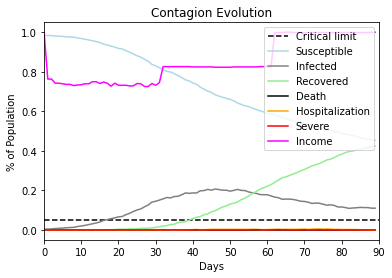

In [17]:
model.reset_randomizer(seed)
statistics = BasicStatistics(model)
model.add_listener(statistics)
for i in range(simulation_cycles):
    model.step()
statistics.export_chart("scenario" + str(sc) + ".png")
statistics.export_csv("scenario" + str(sc) + ".csv")

In [18]:
import logging
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs=30,do_print = True)

Save these seeds if you want to rerun a scenario
[7155, 3421, 6486, 8292, 1712, 3724, 251, 8050, 7259, 3364, 9831, 8819, 5015, 8358, 6035, 1822, 5810, 1029, 83, 1518, 3672, 4411, 1288, 8797, 597, 873, 4823, 8121, 5624, 9637]
run with seed 7155:
run with seed 3421:
run with seed 6486:
run with seed 8292:
run with seed 1712:
run with seed 3724:
run with seed 251:
run with seed 8050:
run with seed 7259:
run with seed 3364:
run with seed 9831:
run with seed 8819:
run with seed 5015:
run with seed 8358:
run with seed 6035:
run with seed 1822:
run with seed 5810:
run with seed 1029:
run with seed 83:
run with seed 1518:
run with seed 3672:
run with seed 4411:
run with seed 1288:
run with seed 8797:
run with seed 597:
run with seed 873:
run with seed 4823:
run with seed 8121:
run with seed 5624:
run with seed 9637:
using average of time series:
stats on susceptible:
data: [0.7729222222222221, 0.38102222222222215, 0.30313333333333337, 0.34146666666666664, 0.5302666666666667, 0.5484222222222221

(<function dict.items>, <function dict.items>, <function dict.items>)